## ReadFile

In [156]:
from Utils.ReadInput import ReadInput, ReadFile, BaseRead
from Utils.GraphComponents import Graph
import Utils.data_files as files
import networkx as nx

## ReadFile or ReadInput Into a Graph (and nx.Graph)
Since `ReadFile` and `ReadInput` both implements `BaseInput` all methods can be applied to both classes. The only difference is when we read in the data.

In [157]:
path = "data/G-ex.txt"
readFile = ReadFile(path)
# or
readFile = ReadFile(files.G_EX)

print(readFile)
print(readFile.edgeTupleList)

Node: 0 is black
Node: 1 is black
Node: 2 is black
Node: 3 is black
Node: 4 is red
Node: 5 is red
Node: 6 is black
Node: 7 is red

Edge: 0 -- 1
Edge: 1 -- 2
Edge: 2 -- 3
Edge: 0 -- 4
Edge: 4 -- 3
Edge: 0 -- 5
Edge: 5 -- 6
Edge: 6 -- 7
Edge: 7 -- 3

[('0', '1'), ('1', '2'), ('2', '3'), ('0', '4'), ('4', '3'), ('0', '5'), ('5', '6'), ('6', '7'), ('7', '3')]


In [158]:
## returns a Graph
graph = readFile.toGraph()

print("nx edges: ", graph.nxGraph.edges)
print("is_directed: ", graph.nxGraph.is_directed())
print("nx nodes: ", graph.nxGraph.nodes)

nx edges:  [('0', '1'), ('0', '4'), ('0', '5'), ('1', '2'), ('2', '3'), ('3', '4'), ('3', '7'), ('5', '6'), ('6', '7')]
is_directed:  False
nx nodes:  ['0', '1', '2', '3', '4', '5', '6', '7']


## Idea 1

### Weigted graph

The red nodes "cost" 1 and black nodes "cost" 0

Then try to spend as less a possible

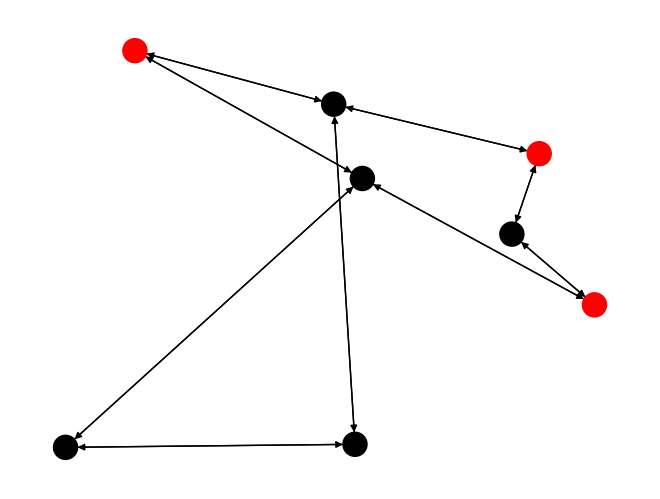

In [159]:
# undirected graph
G = nx.DiGraph()

for edge in readFile.edges:
    u = readFile.getNodeFromName(edge.u)
    v = readFile.getNodeFromName(edge.v)
    
    G.add_edge(u, v, weight = 1 if v.is_red else 0)
    G.add_edge(v, u, weight = 1 if u.is_red else 0)



colors = ["red" if n.is_red else "black" for n in G.nodes]

nx.draw(G, with_labels=False, node_color=colors)

In [160]:
try:
    print(nx.dijkstra_path_length(G, readFile.getNodeFromName(readFile.s), readFile.getNodeFromName(readFile.t), weight='weight'))
except nx.NodeNotFound or nx.NetworkXNoPath:
    print("No path from s to t")
    ## should return -1 in this case

0


## Directed graph

In [161]:
readFile = ReadFile(files.SKI_LEVEL10_1)

print(readFile)
print(readFile.edgeTupleList)

Node: 0 is black
Node: 1 is red
Node: 2 is black
Node: 3 is red
Node: 4 is black
Node: 5 is black
Node: 6 is black
Node: 7 is black
Node: 8 is black
Node: 9 is black
Node: 10 is black
Node: 11 is black
Node: 12 is black
Node: 13 is red
Node: 14 is black
Node: 15 is black
Node: 16 is black
Node: 17 is red
Node: 18 is red
Node: 19 is black
Node: 20 is red
Node: 21 is black
Node: 22 is black
Node: 23 is black
Node: 24 is black
Node: 25 is red
Node: 26 is black
Node: 27 is black
Node: 28 is red
Node: 29 is black
Node: 30 is black
Node: 31 is red
Node: 32 is black
Node: 33 is black
Node: 34 is red
Node: 35 is black
Node: 36 is black
Node: 37 is black
Node: 38 is black
Node: 39 is red
Node: 40 is black
Node: 41 is red
Node: 42 is red
Node: 43 is black
Node: 44 is red
Node: 45 is black
Node: 46 is red
Node: 47 is black
Node: 48 is black
Node: 49 is black
Node: 50 is red
Node: 51 is black
Node: 52 is red
Node: 53 is red
Node: 54 is black
Node: 55 is black
Node: 56 is black
Node: 57 is red
Node

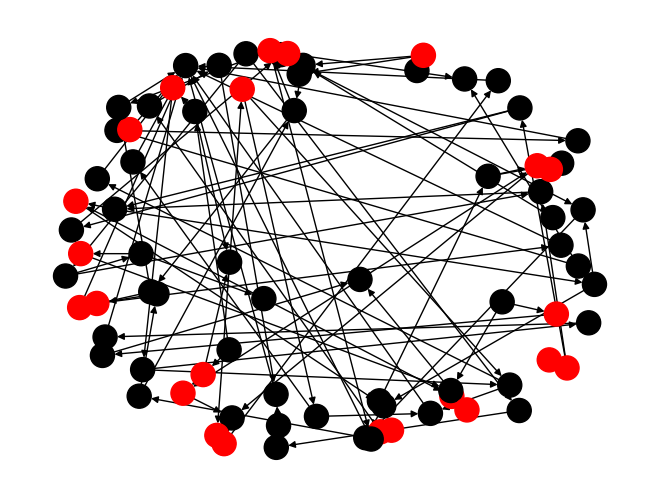

In [162]:
# undirected graph
G = nx.DiGraph()

for edge in readFile.edges:
    u = readFile.getNodeFromName(edge.u)
    v = readFile.getNodeFromName(edge.v)
    
    G.add_edge(u, v, weight = 1 if v.is_red else 0)


colors = ["red" if n.is_red else "black" for n in G.nodes]

nx.draw(G, with_labels=False, node_color=colors)

In [163]:
s = readFile.getNodeFromName(readFile.s)
t = readFile.getNodeFromName(readFile.t)
try:
    print(nx.dijkstra_path_length(G, readFile.getNodeFromName(readFile.s), readFile.getNodeFromName(readFile.t), weight='weight'))
except nx.NodeNotFound or nx.NetworkXNoPath:
    print("No path from s to t")
    ## should return -1 in this case

No path from s to t
